In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

In [71]:
path = "../data/raw/SB1810D2.txt"
df = pd.read_csv(path,low_memory=False,sep="\t")

In [33]:
df

Time       Lat      Long  TTFF  Count  Commands  \
0      2020-03-17 11:03:11  60.34152   5.35557  11.0      0         0   
1      2020-03-17 12:03:10  60.34155   5.35557  11.0      0         0   
2      2020-03-17 12:12:10  60.34158   5.35554  12.0      0         0   
3      2020-03-17 12:19:11  60.34155   5.35557  11.0      0         0   
4      2020-03-17 12:20:00  60.34155   5.35557  12.0      1         0   
...                    ...       ...       ...   ...    ...       ...   
23603  2021-07-22 08:10:00  57.11994  18.20415  12.0     39         0   
23604  2021-07-22 08:20:00  57.11997  18.20415  12.0     40         0   
23605  2021-07-22 08:30:00  57.11994  18.20415  12.0     41         0   
23606  2021-07-22 08:40:00  57.11994  18.20397  13.0     42         0   
23607  2021-07-22 08:50:00  57.11994  18.20412  12.0     43         0   

       TxTries  ONT  DiskUsed  Files  ...  WBT_L14  WBT_L15  WBT_L16  WBT_L17  \
0            0  130         0      0  ...    -82.0    -82.0    -76.0    -76.0   
1            0  130         0      0  ...    -82.0    -82.0    -76.0    -76.0   
2            0  130         0      0  ...    -82.0    -82.0    -76.0    -76.0   
3            0   10         0      0  ...      NaN      NaN      NaN      NaN   
4            1   10         0      0  ...      NaN      NaN      NaN      NaN   
...        ...  ...       ...    ...  ...      ...      ...      ...      ...   
23603        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23604        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23605        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23606        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23607        1   10         1      0  ...      NaN      NaN      NaN      NaN   

       WBT_L18  WBT_L19  ECO3_Beta  ECO3_CHL  ECO3_PC  Unnamed: 42  
0        -76.0    -76.0        NaN       NaN      NaN          NaN  
1        -76.0    -76.0        NaN       NaN      NaN          NaN  
2        -76.0    -76.0        NaN       NaN      NaN          NaN  
3          NaN      NaN        NaN       NaN      NaN          NaN  
4          NaN      NaN        NaN       NaN      NaN          NaN  
...        ...      ...        ...       ...      ...          ...  
23603      NaN      NaN        NaN       NaN      NaN          NaN  
23604      NaN      NaN        NaN       NaN      NaN          NaN  
23605      NaN      NaN        NaN       NaN      NaN          NaN  
23606      NaN      NaN        NaN       NaN      NaN          NaN  
23607      NaN      NaN        NaN       NaN      NaN          NaN  

[23608 rows x 43 columns]

In [34]:
df.columns

Index(['Time', 'Lat', 'Long', 'TTFF', 'Count', 'Commands', 'TxTries', 'ONT',
       'DiskUsed', 'Files', 'I', 'V', 'Temperature', 'CTTemp', 'CTCond',
       'WBT_Status', 'WBT_Step', 'WBT_Min', 'WBT_dB', 'WBT_L00', 'WBT_L01',
       'WBT_L02', 'WBT_L03', 'WBT_L04', 'WBT_L05', 'WBT_L06', 'WBT_L07',
       'WBT_L08', 'WBT_L09', 'WBT_L10', 'WBT_L11', 'WBT_L12', 'WBT_L13',
       'WBT_L14', 'WBT_L15', 'WBT_L16', 'WBT_L17', 'WBT_L18', 'WBT_L19',
       'ECO3_Beta', 'ECO3_CHL', 'ECO3_PC', 'Unnamed: 42'],
      dtype='object')

In [72]:
import matplotlib.ticker as ticker
df['datetime'] = pd.to_datetime(df['Time'])
# df.set_index('datetime', inplace=True)
df

Time       Lat      Long  TTFF  Count  Commands  \
0      2020-03-17 11:03:11  60.34152   5.35557  11.0      0         0   
1      2020-03-17 12:03:10  60.34155   5.35557  11.0      0         0   
2      2020-03-17 12:12:10  60.34158   5.35554  12.0      0         0   
3      2020-03-17 12:19:11  60.34155   5.35557  11.0      0         0   
4      2020-03-17 12:20:00  60.34155   5.35557  12.0      1         0   
...                    ...       ...       ...   ...    ...       ...   
23603  2021-07-22 08:10:00  57.11994  18.20415  12.0     39         0   
23604  2021-07-22 08:20:00  57.11997  18.20415  12.0     40         0   
23605  2021-07-22 08:30:00  57.11994  18.20415  12.0     41         0   
23606  2021-07-22 08:40:00  57.11994  18.20397  13.0     42         0   
23607  2021-07-22 08:50:00  57.11994  18.20412  12.0     43         0   

       TxTries  ONT  DiskUsed  Files  ...  WBT_L15  WBT_L16  WBT_L17  WBT_L18  \
0            0  130         0      0  ...    -82.0    -76.0    -76.0    -76.0   
1            0  130         0      0  ...    -82.0    -76.0    -76.0    -76.0   
2            0  130         0      0  ...    -82.0    -76.0    -76.0    -76.0   
3            0   10         0      0  ...      NaN      NaN      NaN      NaN   
4            1   10         0      0  ...      NaN      NaN      NaN      NaN   
...        ...  ...       ...    ...  ...      ...      ...      ...      ...   
23603        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23604        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23605        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23606        1   10         1      0  ...      NaN      NaN      NaN      NaN   
23607        1   10         1      0  ...      NaN      NaN      NaN      NaN   

       WBT_L19  ECO3_Beta  ECO3_CHL  ECO3_PC  Unnamed: 42            datetime  
0        -76.0        NaN       NaN      NaN          NaN 2020-03-17 11:03:11  
1        -76.0        NaN       NaN      NaN          NaN 2020-03-17 12:03:10  
2        -76.0        NaN       NaN      NaN          NaN 2020-03-17 12:12:10  
3          NaN        NaN       NaN      NaN          NaN 2020-03-17 12:19:11  
4          NaN        NaN       NaN      NaN          NaN 2020-03-17 12:20:00  
...        ...        ...       ...      ...          ...                 ...  
23603      NaN        NaN       NaN      NaN          NaN 2021-07-22 08:10:00  
23604      NaN        NaN       NaN      NaN          NaN 2021-07-22 08:20:00  
23605      NaN        NaN       NaN      NaN          NaN 2021-07-22 08:30:00  
23606      NaN        NaN       NaN      NaN          NaN 2021-07-22 08:40:00  
23607      NaN        NaN       NaN      NaN          NaN 2021-07-22 08:50:00  

[23608 rows x 44 columns]

In [54]:
df[['V','Temperature', 'CTTemp', 'CTCond','ECO3_Beta', 'ECO3_CHL', 'ECO3_PC']].describe()

V   Temperature        CTTemp        CTCond     ECO3_Beta  \
count  23608.000000  23608.000000  23300.000000  23231.000000  10656.000000   
mean      13.467181     15.751779     12.829770      9.259649      0.001305   
std        0.310928      5.682479      5.481227      1.143313      0.001138   
min       12.800000      3.000000      2.497000      0.000000      0.000090   
25%       13.300000     10.000000      7.473000      8.180000      0.000558   
50%       13.400000     15.000000     12.279500      9.400000      0.001146   
75%       13.600000     21.000000     17.504000     10.240000      0.001566   
max       14.200000     32.000000     26.301000     11.960000      0.011886   

           ECO3_CHL      ECO3_PC  
count  10686.000000  7682.000000  
mean       0.913752     0.282778  
std        0.554317     1.084408  
min        0.000000     0.000000  
25%        0.520000     0.000000  
50%        0.770000     0.100000  
75%        1.140000     0.250000  
max        9.790000    62.750000

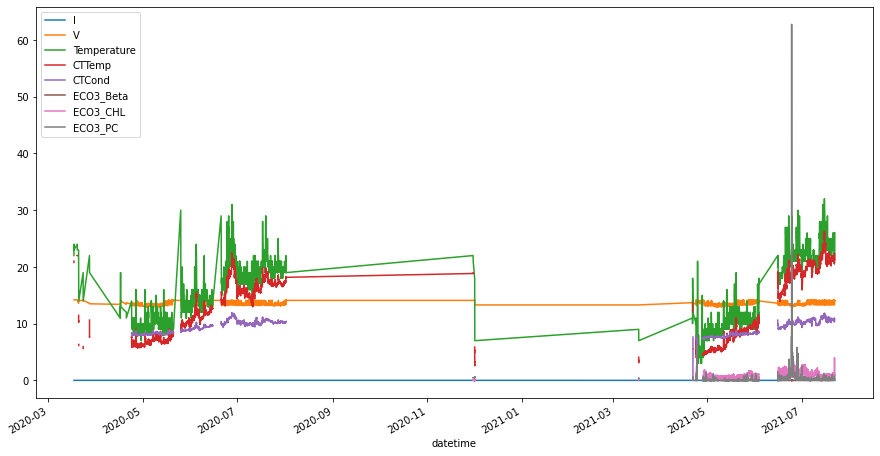

In [40]:
df[['I', 'V', 'Temperature', 'CTTemp', 'CTCond','ECO3_Beta', 'ECO3_CHL', 'ECO3_PC']].plot(figsize=(15,8))
plt.show()

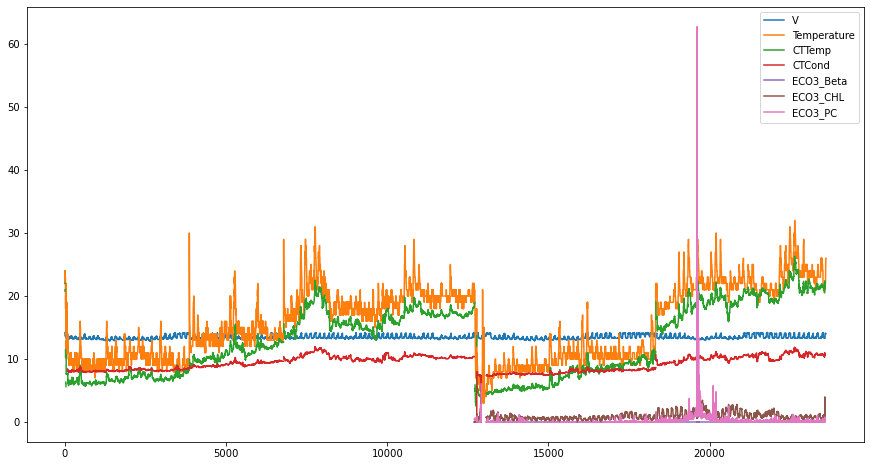

In [48]:
df.reset_index(drop=True, inplace=True)
df[['V','Temperature', 'CTTemp', 'CTCond','ECO3_Beta', 'ECO3_CHL', 'ECO3_PC']].plot(figsize=(15,8))
plt.show()

In [55]:
df

Time       Lat      Long  TTFF  Count  \
datetime                                                                    
2020-03-17 11:03:11  2020-03-17 11:03:11  60.34152   5.35557  11.0      0   
2020-03-17 12:03:10  2020-03-17 12:03:10  60.34155   5.35557  11.0      0   
2020-03-17 12:12:10  2020-03-17 12:12:10  60.34158   5.35554  12.0      0   
2020-03-17 12:19:11  2020-03-17 12:19:11  60.34155   5.35557  11.0      0   
2020-03-17 12:20:00  2020-03-17 12:20:00  60.34155   5.35557  12.0      1   
...                                  ...       ...       ...   ...    ...   
2021-07-22 08:10:00  2021-07-22 08:10:00  57.11994  18.20415  12.0     39   
2021-07-22 08:20:00  2021-07-22 08:20:00  57.11997  18.20415  12.0     40   
2021-07-22 08:30:00  2021-07-22 08:30:00  57.11994  18.20415  12.0     41   
2021-07-22 08:40:00  2021-07-22 08:40:00  57.11994  18.20397  13.0     42   
2021-07-22 08:50:00  2021-07-22 08:50:00  57.11994  18.20412  12.0     43   

                     Commands  TxTries  ONT  DiskUsed  Files  ...  WBT_L14  \
datetime                                                      ...            
2020-03-17 11:03:11         0        0  130         0      0  ...    -82.0   
2020-03-17 12:03:10         0        0  130         0      0  ...    -82.0   
2020-03-17 12:12:10         0        0  130         0      0  ...    -82.0   
2020-03-17 12:19:11         0        0   10         0      0  ...      NaN   
2020-03-17 12:20:00         0        1   10         0      0  ...      NaN   
...                       ...      ...  ...       ...    ...  ...      ...   
2021-07-22 08:10:00         0        1   10         1      0  ...      NaN   
2021-07-22 08:20:00         0        1   10         1      0  ...      NaN   
2021-07-22 08:30:00         0        1   10         1      0  ...      NaN   
2021-07-22 08:40:00         0        1   10         1      0  ...      NaN   
2021-07-22 08:50:00         0        1   10         1      0  ...      NaN   

                     WBT_L15  WBT_L16  WBT_L17  WBT_L18  WBT_L19  ECO3_Beta  \
datetime                                                                      
2020-03-17 11:03:11    -82.0    -76.0    -76.0    -76.0    -76.0        NaN   
2020-03-17 12:03:10    -82.0    -76.0    -76.0    -76.0    -76.0        NaN   
2020-03-17 12:12:10    -82.0    -76.0    -76.0    -76.0    -76.0        NaN   
2020-03-17 12:19:11      NaN      NaN      NaN      NaN      NaN        NaN   
2020-03-17 12:20:00      NaN      NaN      NaN      NaN      NaN        NaN   
...                      ...      ...      ...      ...      ...        ...   
2021-07-22 08:10:00      NaN      NaN      NaN      NaN      NaN        NaN   
2021-07-22 08:20:00      NaN      NaN      NaN      NaN      NaN        NaN   
2021-07-22 08:30:00      NaN      NaN      NaN      NaN      NaN        NaN   
2021-07-22 08:40:00      NaN      NaN      NaN      NaN      NaN        NaN   
2021-07-22 08:50:00      NaN      NaN      NaN      NaN      NaN        NaN   

                     ECO3_CHL  ECO3_PC  Unnamed: 42  
datetime                                             
2020-03-17 11:03:11       NaN      NaN          NaN  
2020-03-17 12:03:10       NaN      NaN          NaN  
2020-03-17 12:12:10       NaN      NaN          NaN  
2020-03-17 12:19:11       NaN      NaN          NaN  
2020-03-17 12:20:00       NaN      NaN          NaN  
...                       ...      ...          ...  
2021-07-22 08:10:00       NaN      NaN          NaN  
2021-07-22 08:20:00       NaN      NaN          NaN  
2021-07-22 08:30:00       NaN      NaN          NaN  
2021-07-22 08:40:00       NaN      NaN          NaN  
2021-07-22 08:50:00       NaN      NaN          NaN  

[23608 rows x 43 columns]

<AxesSubplot:>

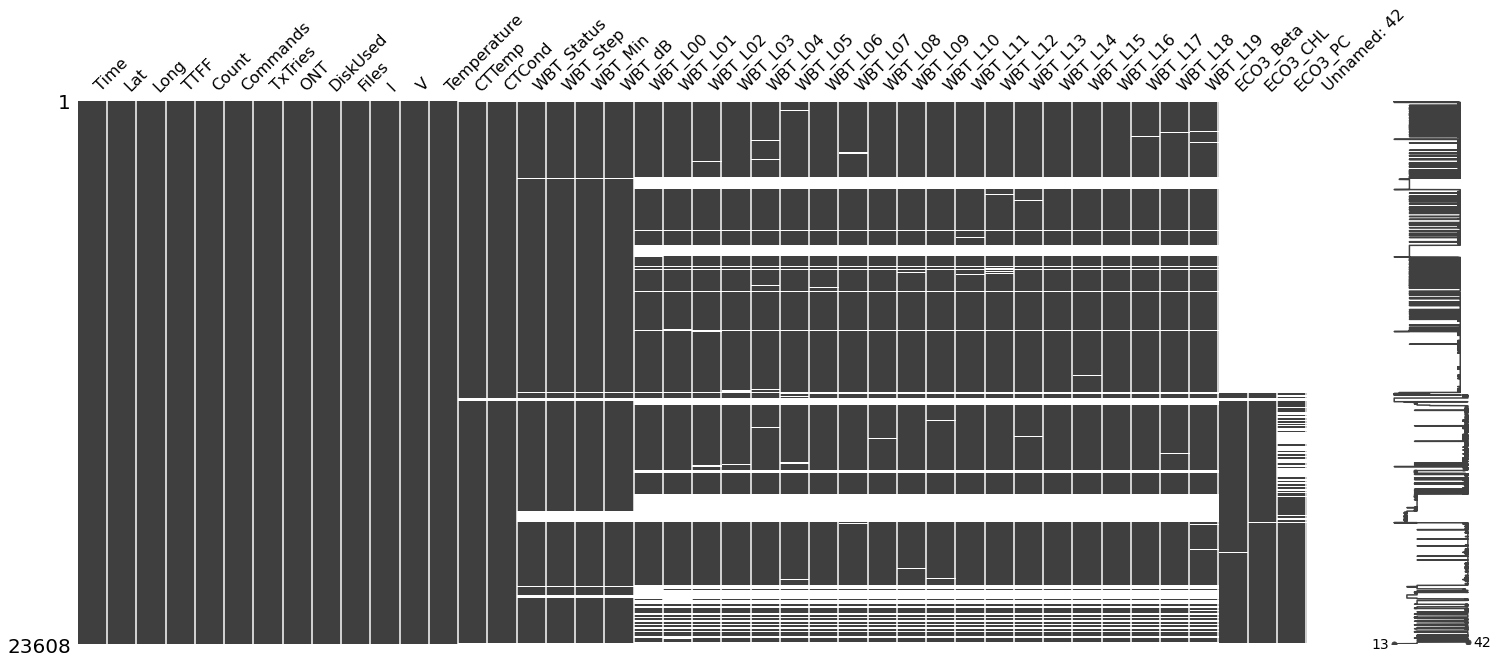

In [57]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

<AxesSubplot:>

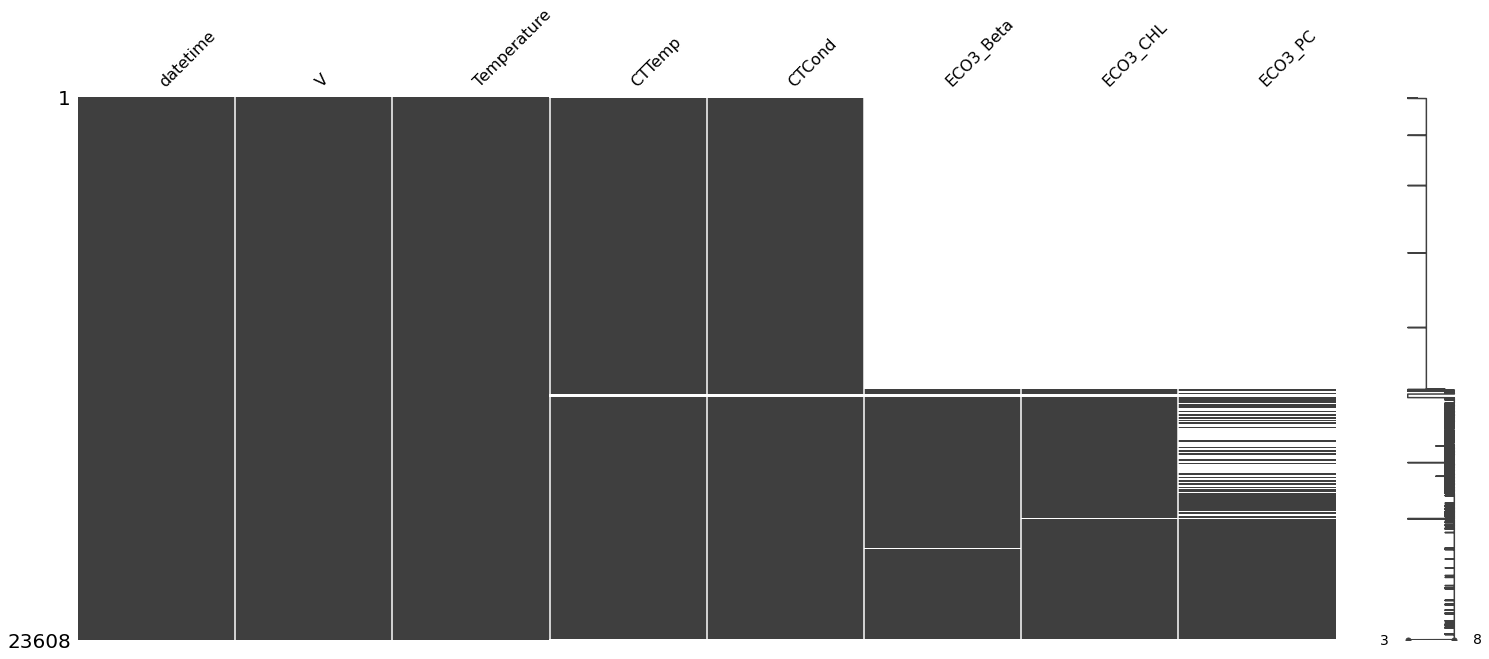

In [73]:
# df.reset_index(drop=True, inplace=True)

msno.matrix(df[['V','Temperature', 'CTTemp', 'CTCond','ECO3_Beta', 'ECO3_CHL', 'ECO3_PC']],)


In [2]:
combined_df = df = pd.read_csv('../data/interim/combined_data.gz')

In [94]:
combined_df.describe()

Ping_index  Ping_milliseconds          Range          Depth  \
count  106563.000000      106563.000000  106563.000000  106563.000000   
mean      413.270338         505.692229      51.030642      51.503191   
std       235.266314         291.426715      23.610948      23.550731   
min         0.000000           0.000000       2.274308       2.869631   
25%       209.000000         253.000000      24.964908      25.493878   
50%       409.000000         509.000000      67.191234      67.616535   
75%       616.000000         759.000000      71.486178      71.907127   
max       836.000000         999.000000      98.786626      98.514207   

             185.000        185.122        185.244        185.366  \
count  106563.000000  106563.000000  106563.000000  106563.000000   
mean      -46.830596     -47.237167     -47.639705     -48.024482   
std         8.512635       8.392801       8.285811       8.178012   
min       -95.189910     -96.789969     -99.575039     -99.653071   
25%       -52.748989     -53.045736     -53.333681     -53.628164   
50%       -47.323287     -47.694561     -48.055235     -48.400195   
75%       -41.083056     -41.587340     -42.095275     -42.572527   
max       -10.121630     -10.814217     -10.442404     -10.205871   

             185.488        185.610  ...        254.946            Lat  \
count  106563.000000  106563.000000  ...  106563.000000  106563.000000   
mean      -48.386437     -48.719825  ...     -47.074082      57.345603   
std         8.080754       7.983706  ...      10.393285       0.318683   
min      -101.318544     -96.882882  ...    -101.992250      56.891880   
25%       -53.893357     -54.150436  ...     -54.223821      57.053310   
50%       -48.713572     -49.013693  ...     -47.724165      57.330150   
75%       -43.018874     -43.448417  ...     -40.300400      57.606180   
max       -10.088476     -10.077787  ...       2.436974      57.742800   

                Long              V    Temperature         CTTemp  \
count  106563.000000  106563.000000  106563.000000  106563.000000   
mean       17.754015      13.238025       8.875707       5.532009   
std         0.161514       0.238470       1.233250       0.347830   
min        17.356650      12.900000       8.000000       5.033000   
25%        17.743230      13.100000       8.000000       5.292000   
50%        17.838360      13.100000       8.000000       5.595000   
75%        17.847720      13.500000       9.000000       5.882000   
max        17.908440      13.800000      12.000000       6.044000   

              CTCond      ECO3_Beta       ECO3_CHL  ECO3_PC  
count  106563.000000  106563.000000  106563.000000  10072.0  
mean        7.569043       0.000415       0.567142      0.0  
std         0.086213       0.000082       0.167629      0.0  
min         7.440000       0.000261       0.240000      0.0  
25%         7.480000       0.000393       0.370000      0.0  
50%         7.560000       0.000408       0.650000      0.0  
75%         7.670000       0.000435       0.690000      0.0  
max         7.700000       0.000642       0.800000      0.0  

[8 rows x 587 columns]

In [3]:
combined_df = combined_df.sort_values(by='datetime')
combined_df.columns

Index(['Ping_index', 'Ping_milliseconds', 'Range', 'Depth', '185.000',
       '185.122', '185.244', '185.366', '185.488', '185.610',
       ...
       'datetime', 'Lat', 'Long', 'V', 'Temperature', 'CTTemp', 'CTCond',
       'ECO3_Beta', 'ECO3_CHL', 'ECO3_PC'],
      dtype='object', length=588)

<AxesSubplot:xlabel='datetime'>

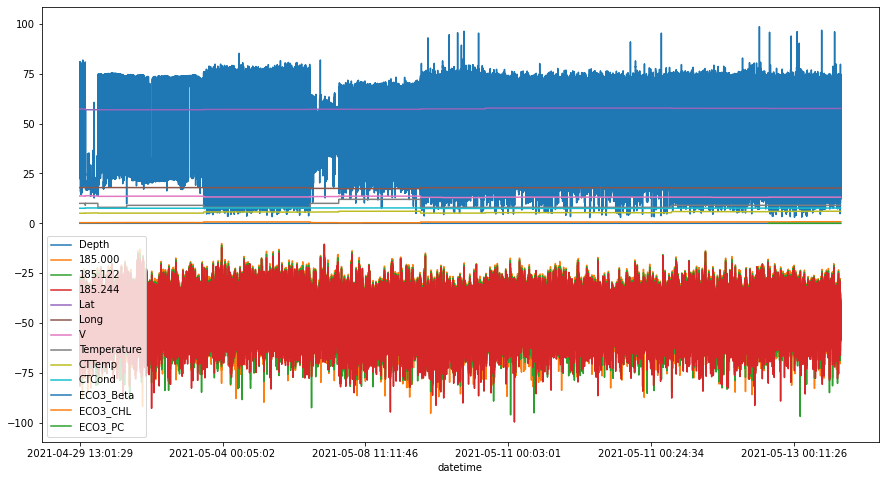

In [7]:
# plt_df = combined_df.set_index('datetime', inplace=True)

combined_df[['Depth', '185.000',
       '185.122', '185.244','Lat', 'Long', 'V', 'Temperature', 'CTTemp', 'CTCond',
       'ECO3_Beta', 'ECO3_CHL', 'ECO3_PC']].plot(figsize=(15,8))

<AxesSubplot:>

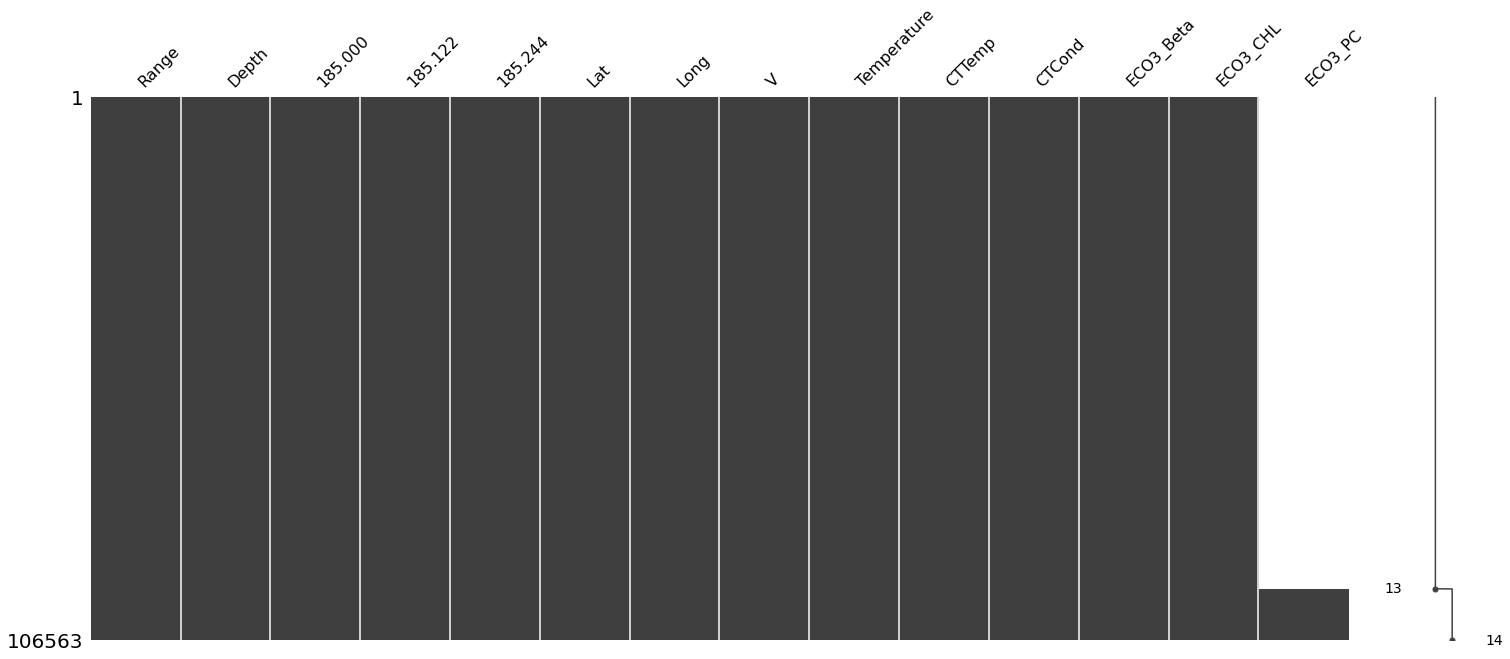

In [7]:
msno.matrix(combined_df[['Range', 'Depth', '185.000',
       '185.122', '185.244','Lat', 'Long', 'V', 'Temperature', 'CTTemp', 'CTCond',
       'ECO3_Beta', 'ECO3_CHL', 'ECO3_PC']])

In [5]:
dataset_cols = list(combined_df.columns[5:-10]) #+ list(combined_df.columns[-7:-3])
print(dataset_cols[-20:])
pca_data = combined_df[dataset_cols].dropna().values
print(np.shape(pca_data))

['252.627', '252.749', '252.871', '252.993', '253.115', '253.237', '253.359', '253.481', '253.604', '253.726', '253.848', '253.970', '254.092', '254.214', '254.336', '254.458', '254.580', '254.702', '254.824', '254.946']
(106563, 573)


In [8]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
X_centered = (pca_data - pca_data.mean(axis=0))/pca_data.std(axis=0)
X_centered = X_centered[:50000]
pca.fit(X_centered[:50000])
X_pca = pca.transform(X_centered)

# plt.figure(figsize=(15,8))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, cmap='cividis')

In [9]:
from sklearn.manifold import TSNE


tsne_data = np.concatenate([X_pca, combined_df[list(combined_df.columns[-7:-3])].dropna().values[:50000]],axis=-1)
print(np.shape(tsne_data))

tsne = TSNE(n_components=2, verbose=0,  n_iter=500) # perplexity=40,
tsne_results = tsne.fit_transform(tsne_data)

(50000, 6)


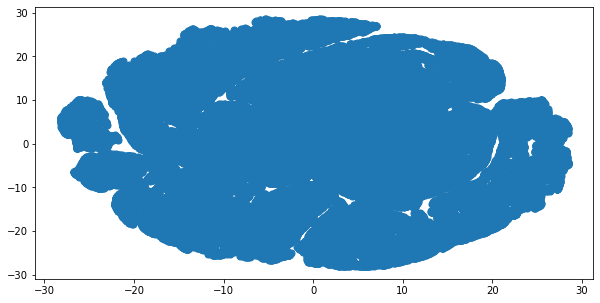

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=50, cmap='cividis')

In [ ]:
from sklearn.cluster import SpectralClustering

single = SpectralClustering(n_clusters=8, affinity='rbf', assign_labels='kmeans')
X = tsne_results
labels = single.fit_predict(X)

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='cividis')
plt.show()